In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
#('2017-08-23',)
date_format = "%Y-%m-%d"
most_recent_measurement = session.query(Measurement.date,func.max(Measurement.date)).all()[0][0]
most_recent_date = dt.datetime.strptime(most_recent_measurement,date_format)
most_recent_date.year

2017

Text(0, 0.5, 'inches')

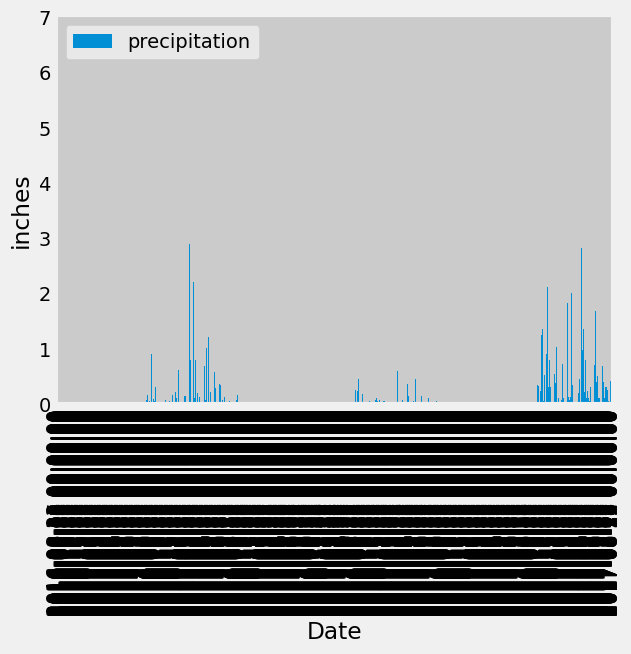

In [222]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date_range_year = most_recent_date.year - 1
start_date_range = dt.datetime(start_date_range_year,most_recent_date.month,most_recent_date.day).strftime(date_format)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date_range)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.read_sql(last_year_prcp_data.statement,last_year_prcp_data.session.bind,parse_dates=["date"])
prcp_df.rename(columns={"prcp":"precipitation"},inplace=True)

# Sort the dataframe by date
prcp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
tick_loc = [1,3,4,5]

#plt.bar(prcp_df["date"],prcp_df["precipitation"],width=3)
prcp_df.plot('date','precipitation',kind="bar")
plt.xticks(rotation=90)
plt.legend(labels=["precipitation"])
plt.xlabel("Date")
plt.ylabel("inches")

In [109]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [147]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
[row for row in station_counts]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [155]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# [(54.0, 85.0, 71.66378066378067)]
most_active_station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == station_counts[0][0]).all()
most_active_station

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

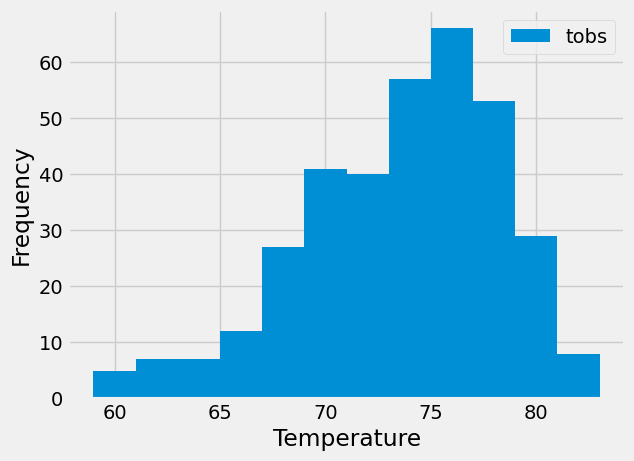

In [199]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= start_date_range).all()

most_active_station_df = pd.DataFrame(most_active_station_data)
most_active_station_df.plot(kind="hist",bins=12)


plt.legend(labels=["tobs"])
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [16]:
# Close Session
session.close()